# Notebook 5: Combining all Previous Approaches


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import glob
import pandas as pd
import sklearn
from src import corr_utils as corr_utils
from src import ana_utils as ana_utils
import collections
import scipy.stats


#np.set_printoptions(suppress=True)
from sklearn.linear_model import LinearRegression

np.random.seed(7)

Import datasets from Notebook 1

In [2]:
wb_data = pd.read_csv("data/wb_data.csv", index_col="Country Name")
wb_data_short = pd.read_csv("data/wb_data_short.csv", index_col="Country Name")
whr_data = pd.read_csv("data/whr_data.csv", index_col="Country name")

Import reduced datasets from Notebook 3

In [3]:
wb_data_pear_sorted = pd.read_csv("data/wb_data_pear_sorted.csv").set_index(wb_data.index)
wb_data_vif_sorted = pd.read_csv("data/wb_data_vif_sorted.csv").set_index(wb_data.index)

# Least Squares Regression, with normalized data

### Pearson indicators

In [4]:
least_squares = sklearn.linear_model.LinearRegression()

In [5]:
test_size = 30
num_indicator_list = [10, 20, 30, 40, 50, 75, 100, 121]
ceval_kwargs = {"reg_model" : least_squares, "n" : 1000, "gt" : whr_data, "test_size" : test_size, "scaling" : "normalize", "calc_adj_r_squared" : True}

lin_pearson_loss, _ = corr_utils.multi_ceval(num_indicator_list, wb_data_pear_sorted, False, **ceval_kwargs)

### VIF indicators

In [6]:
ceval_kwargs = {"reg_model" : least_squares, "n" : 1000, "gt" : whr_data, "test_size" : test_size, "scaling" : "normalize", "calc_adj_r_squared" : True}

lin_vif_loss, _ = corr_utils.multi_ceval(num_indicator_list, wb_data_vif_sorted, False, **ceval_kwargs)

### Random indicators

In [63]:
lin_rand_loss, rand_std_list = corr_utils.ind_removal_sim([10, 20, 30, 40, 50, 75, 100, 121], 50, least_squares, 100, wb_data, whr_data)

Number of indicators 10
Avg. Loss 0.5460797118828326
Loss STD 0.11281753511721929
Avg. Total Coef. Size 114.306798 

Number of indicators 20
Avg. Loss 0.5690894294761893
Loss STD 0.15388907798800971
Avg. Total Coef. Size 421453214050.64874 

Number of indicators 30
Avg. Loss 0.6003314127715099
Loss STD 0.162306148110124
Avg. Total Coef. Size 45748195037305.22 

Number of indicators 40
Avg. Loss 0.6549321449004378
Loss STD 0.23536965655908712
Avg. Total Coef. Size 21194294941740.914 

Number of indicators 50
Avg. Loss 0.9059489234861815
Loss STD 0.35518499039306234
Avg. Total Coef. Size 68234411058078.66 

Number of indicators 75
Avg. Loss 1.547114981037759
Loss STD 0.6650357926756436
Avg. Total Coef. Size 103637903183694.9 

Number of indicators 100
Avg. Loss 3.5865524585427164
Loss STD 1.451515987769183
Avg. Total Coef. Size 34919549290187.535 

Number of indicators 121
Avg. Loss 37.62261631667672
Loss STD 46.68492588382599
Avg. Total Coef. Size 625300063663.5509 



### Full set of indicators

In [7]:
#_, lin_full_loss, _, _ = ana_utils.n_fold_ceval(reg_model=least_squares, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")

### Manually shortened set of indicators

In [8]:
_, lin_short_loss, _, _ = ana_utils.n_fold_ceval(reg_model=least_squares, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")

# Ridge Regression, with normalized data

### Pearson indicators

In [9]:
ridge = sklearn.linear_model.Ridge()

In [10]:
test_size = 30
num_indicator_list = [10, 20, 30, 40, 50, 75, 100, 121]
ceval_kwargs = {"reg_model" : ridge, "n" : 1000, "gt" : whr_data, "test_size" : test_size, "scaling" : "normalize", "calc_adj_r_squared" : True}

ridge_pearson_loss, _ = corr_utils.multi_ceval(num_indicator_list, wb_data_pear_sorted, False, **ceval_kwargs)

### VIF indicators

In [11]:
ceval_kwargs = {"reg_model" : ridge, "n" : 1000, "gt" : whr_data, "test_size" : test_size, "scaling" : "normalize", "calc_adj_r_squared" : True}

ridge_vif_loss, _ = corr_utils.multi_ceval(num_indicator_list, wb_data_vif_sorted, False, **ceval_kwargs)

### Random indicators

In [64]:
ridge_rand_loss, rand_std_list = corr_utils.ind_removal_sim([10, 20, 30, 40, 50, 75, 100, 121], 50, ridge, 100, wb_data, whr_data)

Number of indicators 10
Avg. Loss 0.8540121162575844
Loss STD 0.09301437165599284
Avg. Total Coef. Size 10.908398 

Number of indicators 20
Avg. Loss 0.6892606259544166
Loss STD 0.05786087068726898
Avg. Total Coef. Size 17.000228000000003 

Number of indicators 30
Avg. Loss 0.604327928144001
Loss STD 0.05711201628902233
Avg. Total Coef. Size 20.926966000000004 

Number of indicators 40
Avg. Loss 0.5407227677744464
Loss STD 0.03828903814865923
Avg. Total Coef. Size 23.844299999999997 

Number of indicators 50
Avg. Loss 0.5143292725864897
Loss STD 0.030773055826841856
Avg. Total Coef. Size 25.996628000000005 

Number of indicators 75
Avg. Loss 0.4509770816874374
Loss STD 0.02247955133237192
Avg. Total Coef. Size 30.307640000000003 

Number of indicators 100
Avg. Loss 0.4163836777377638
Loss STD 0.01864221537352784
Avg. Total Coef. Size 33.154264 

Number of indicators 121
Avg. Loss 0.38994643457966033
Loss STD 0.016888271441606005
Avg. Total Coef. Size 35.19562 



### Full set of indicators

In [12]:
#_, ridge_full_loss, _, _ = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")

### Manually shortened set of indicators

In [13]:
_, ridge_short_loss, _, _ = ana_utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")

# Lasso regression

### Pearson indicators

In [14]:
lasso = sklearn.linear_model.Lasso(alpha=0.001, max_iter=10_000)

In [15]:
test_size = 30
num_indicator_list = [10, 20, 30, 40, 50, 75, 100, 121]
ceval_kwargs = {"reg_model" : lasso, "n" : 1000, "gt" : whr_data, "test_size" : test_size, "scaling" : "normalize", "calc_adj_r_squared" : True}

lasso_pearson_loss, _ = corr_utils.multi_ceval(num_indicator_list, wb_data_pear_sorted, False, **ceval_kwargs)

### VIF indicators

In [16]:
ceval_kwargs = {"reg_model" : lasso, "n" : 1000, "gt" : whr_data, "test_size" : test_size, "scaling" : "normalize", "calc_adj_r_squared" : True}

lasso_vif_loss, _ = corr_utils.multi_ceval(num_indicator_list, wb_data_vif_sorted, False, **ceval_kwargs)

### Full set of indicators

In [17]:
#_, lasso_full_loss, _, _ = ana_utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")

### Manually shortened set of indicators

In [18]:
_, lasso_short_loss, _, _ = ana_utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")

# Partial Least Squares

### Pearson indicators

In [19]:
from sklearn.cross_decomposition import PLSRegression
pls = pls = PLSRegression(n_components=3)

In [20]:
test_size = 30
num_indicator_list = [10, 20, 30, 40, 50, 75, 100, 121]
ceval_kwargs = {"reg_model" : pls, "n" : 1000, "gt" : whr_data, "test_size" : test_size, "scaling" : "normalize", "calc_adj_r_squared" : True}

pls_pearson_loss, _ = corr_utils.multi_ceval(num_indicator_list, wb_data_pear_sorted, False, **ceval_kwargs)

### VIF indicators

In [21]:
ceval_kwargs = {"reg_model" : pls, "n" : 1000, "gt" : whr_data, "test_size" : test_size, "scaling" : "normalize", "calc_adj_r_squared" : True}

pls_vif_loss, _ = corr_utils.multi_ceval(num_indicator_list, wb_data_vif_sorted, False, **ceval_kwargs)

### Random indicators

In [ ]:
pls_rand_loss, rand_std_list = corr_utils.ind_removal_sim([10, 20, 30, 40, 50, 75, 100, 121], 50, pls, 100, wb_data, whr_data)

### Full set of indicators

In [22]:
#_, pls_full_loss, _, _ = ana_utils.n_fold_ceval(reg_model=pls, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")

### Manually shortened set of indicators

In [23]:
_, pls_short_loss, _, _ = ana_utils.n_fold_ceval(reg_model=pls, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")

# Plotting
Note: Plots sehen schöner aus wenn man Random Reduction rausnimmt :/

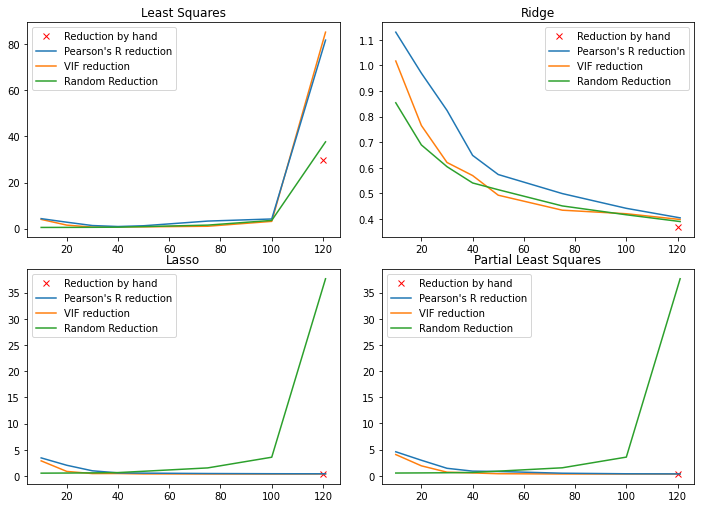

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

# Least Squares
ax[0,0].errorbar(num_indicator_list, lin_pearson_loss, label = "Pearson's R reduction")
ax[0,0].errorbar(num_indicator_list, lin_vif_loss, label = "VIF reduction", barsabove=True)
ax[0,0].errorbar(num_indicator_list, lin_rand_loss, label = "Random Reduction")
ax[0,0].plot(120, lin_short_loss,'rx', label="Reduction by hand") 
ax[0,0].set_title("Least Squares")
ax[0,0].legend()

# Ridge
ax[0,1].errorbar(num_indicator_list, ridge_pearson_loss, label = "Pearson's R reduction")
ax[0,1].errorbar(num_indicator_list, ridge_vif_loss, label = "VIF reduction", barsabove=True)
ax[0,1].errorbar(num_indicator_list, ridge_rand_loss, label = "Random Reduction")
ax[0,1].plot(120, ridge_short_loss,'rx', label="Reduction by hand") 
ax[0,1].set_title("Ridge")
ax[0,1].legend()

# Lasso
ax[1,0].errorbar(num_indicator_list, lasso_pearson_loss, label = "Pearson's R reduction")
ax[1,0].errorbar(num_indicator_list, lasso_vif_loss, label = "VIF reduction", barsabove=True)
ax[1,0].errorbar(num_indicator_list, lin_rand_loss, label = "Random Reduction")
ax[1,0].plot(120, lasso_short_loss,'rx', label="Reduction by hand") 
ax[1,0].set_title("Lasso")
ax[1,0].legend()

# Partial Least Squares
ax[1,1].errorbar(num_indicator_list, pls_pearson_loss, label = "Pearson's R reduction")
ax[1,1].errorbar(num_indicator_list, pls_vif_loss, label = "VIF reduction", barsabove=True)
ax[1,1].errorbar(num_indicator_list, lin_rand_loss, label = "Random Reduction")
ax[1,1].plot(120, pls_short_loss,'rx', label="Reduction by hand") 
ax[1,1].set_title("Partial Least Squares")
ax[1,1].legend()


plt.show()